In [138]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import os
import datetime
import seaborn

In [13]:
path = r'C:\Users\kusof\OneDrive\Рабочий стол\Covid'
files = os.listdir(path)
dfs = []

for i in files:
    dfs.append(pd.read_excel(path+"\\"+i))


In [41]:
ex1 = dfs[0][['day','month','year','cases','countriesAndTerritories']].copy()
ex1['date'] = pd.to_datetime((ex1.year*10000+ex1.month*100+ex1.day).apply(str),format='%Y%m%d')

In [69]:
#ex1.groupby(['countriesAndTerritories']).agg({'cases':'sum'}).sort_values(by=['cases'], ascending=False)
top10_cases = ex1.groupby(['countriesAndTerritories']).agg({'cases':'sum'}).sort_values(by=['cases'], ascending=False)[:10]
top10_cases



0       2020-10-22
1       2020-10-21
2       2020-10-20
3       2020-10-19
4       2020-10-18
           ...    
50617   2020-03-25
50618   2020-03-24
50619   2020-03-23
50620   2020-03-22
50621   2020-03-21
Name: date, Length: 50622, dtype: datetime64[ns]

<AxesSubplot:xlabel='countriesAndTerritories', ylabel='cases'>

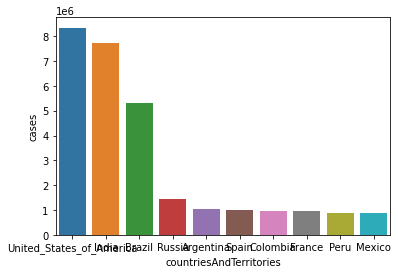

In [59]:
#seaborn.barplot(top10_cases[top10_cases.columns[0]],top10_cases[top10_cases.columns[1]])
top10_cases = top10_cases.reset_index()[['countriesAndTerritories','cases']]
seaborn.barplot(x = top10_cases[top10_cases.columns[0]],y = top10_cases[top10_cases.columns[1]])

In [67]:
for column in dfs[0].columns:
    print(column)
    
dfs[0][dfs[0].columns[-1]]*100000

dateRep
day
month
year
cases
deaths
countriesAndTerritories
geoId
countryterritoryCode
popData2019
continentExp
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000


0        235004.918
1        217392.693
2        210558.098
3        225804.502
4        221861.467
            ...    
50617           NaN
50618           NaN
50619           NaN
50620           NaN
50621           NaN
Name: Cumulative_number_for_14_days_of_COVID-19_cases_per_100000, Length: 50622, dtype: float64

5

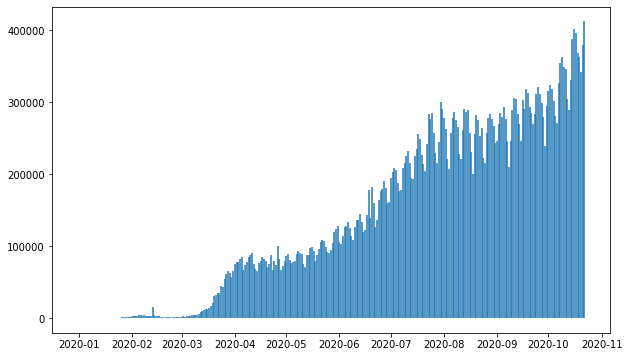

In [86]:
df1 = dfs[0].copy()
df1['date'] = pd.to_datetime((df1.year*10000+df1.month*100+df1.day).apply(str),format='%Y%m%d')
grouped_by_date = df1.groupby(['date']).agg({'cases':'sum','deaths':'sum'}).reset_index()
#grouped_by_date
plt.figure(figsize = (10,6))
plt.vlines(x = grouped_by_date['date'].sort_values(), ymin = grouped_by_date['cases'].min(), ymax = grouped_by_date['cases'])

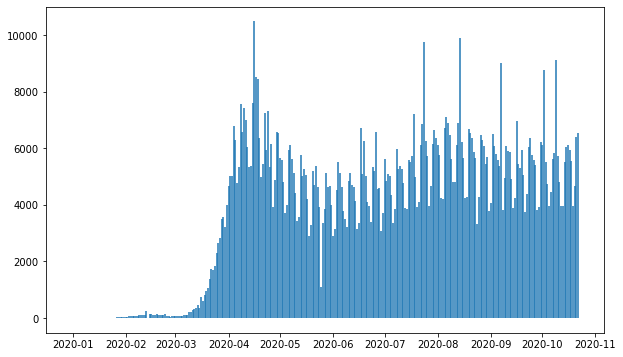

In [88]:
plt.figure(figsize = (10,6))
plt.vlines(x = grouped_by_date['date'].sort_values(), ymin = grouped_by_date['deaths'].min(), ymax = grouped_by_date['deaths'])b

<AxesSubplot:>

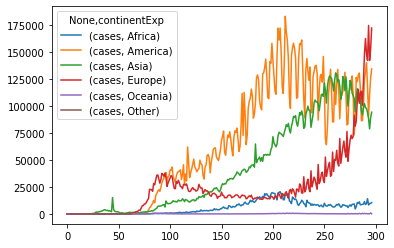

In [108]:
grouped_by_date_and_con.reset_index()[['cases']].plot()


In [135]:
# plt.stackplot(grouped_by_date_and_con.reset_index()[['date']],grouped_by_date_and_con.reset_index()[['cases']].to_dict(),grouped_by_date_and_con.reset_index()[['cases']].to_dict().keys())
# year, population_by_continent.values(),
#              labels=population_by_continent.keys())
# grouped_by_date_and_con.reset_index()[['cases']]
df_lol = grouped_by_date_and_con.reset_index()
df_lol = df_lol.set_index(['date'])
df_lol[['date','cases']]
plt.stackplot(df_lol[['date']],df_lol.values(),df_lol.keys())

TypeError: 'numpy.ndarray' object is not callable

In [144]:
# df_lol[['cases']][df_lol.cases>=0].plot(kind = 'area')
# plt.stackplot(df_lol[['cases']])




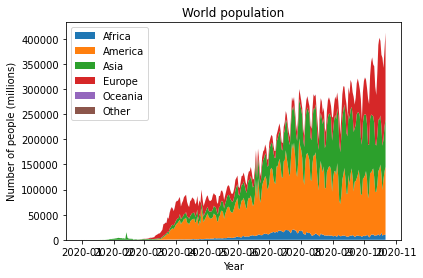

In [209]:
z = df_lol[['cases']].keys()

val = [df_lol.loc[:,i] for i in z]

fig, ax = plt.subplots()
ax.stackplot(df_lol.index, *val,
             labels=[i[1] for i in df_lol.keys()][2:])
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')
keys = [i[1] for i in df_lol.keys()]
keys
#figsize correction
plt.show()

In [210]:
df_lol_perc = df_lol['cases']
df_lol_perc['total'] = df_lol_perc.sum(axis = 1)
for col in df_lol_perc.columns:
    df_lol_perc[col] = df_lol_perc[col]/df_lol_perc['total']*100
df_lol_perc[df_lol_perc.columns[:-1]]
df_lol_perc


<ipython-input-210-f9e4912ea198>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lol_perc['total'] = df_lol_perc.sum(axis = 1)
<ipython-input-210-f9e4912ea198>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lol_perc[col] = df_lol_perc[col]/df_lol_perc['total']*100


continentExp,Africa,America,Asia,Europe,Oceania,Other,total
date,,,,,,,
2019-12-31,0.000000,0.000000,100.000000,0.000000,0.000000,0.0,100.0
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.000000,0.000000,100.000000,0.000000,0.000000,0.0,100.0
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-10-18,3.845287,31.929869,25.516350,38.685132,0.023362,0.0,100.0
2020-10-19,2.291424,25.022237,24.380252,48.288131,0.017956,0.0,100.0
2020-10-20,2.812651,32.471816,23.065316,41.623021,0.027197,0.0,100.0


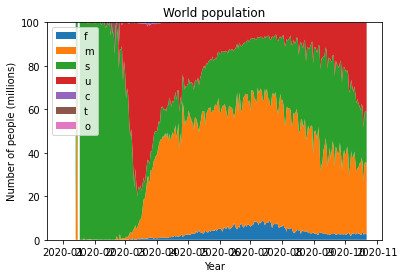

In [211]:
z = df_lol_perc.keys()

val = [df_lol_perc.loc[:,i] for i in z]

fig, ax = plt.subplots()
ax.stackplot(df_lol_perc.index, *val,
             labels=[i[1] for i in df_lol_perc.keys()])
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')
plt.ylim(0,100)
keys = [i[1] for i in df_lol_perc.keys()]
keys
#figsize correction
plt.show()

In [201]:
z = df_lol_perc[['cases']].keys()

val = [df_lol_perc.loc[:,i] for i in z]

fig, ax = plt.subplots()
ax.stackplot(df_lol_perc.index, *val,
             labels=[i[1] for i in df_lol_perc.keys()][2:])
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')
keys = [i[1] for i in df_lol_perc.keys()]
keys
#figsize correction
plt.show()

KeyError: "None of [Index(['cases'], dtype='object', name='continentExp')] are in the [columns]"

In [244]:
df_big = dfs[0][dfs[0]['popData2019']>1e+8].copy()
df_big['date'] = pd.to_datetime((df_big.year*10000+df_big.month*100+df_big.day).apply(str),format='%Y%m%d')
df_big = df_big.sort_values(by = ['date'])
df_big = df_big[['date','cases','countriesAndTerritories']]
df_big = df_big.pivot_table(values='cases', index=df_big.date, columns='countriesAndTerritories', aggfunc='sum')
df_big.fillna(0,inplace = True)
df_big = df_big.cumsum()

In [245]:
df_big

countriesAndTerritories,Bangladesh,Brazil,China,Egypt,Ethiopia,India,Indonesia,Japan,Mexico,Nigeria,Pakistan,Philippines,Russia,United_States_of_America
date,,,,,,,,,,,,,,
2019-12-31,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-18,387295.0,5224362.0,90955.0,105297.0,88434.0,7494551.0,357762.0,92656.0,849907.0,61307.0,323019.0,354338.0,1384235.0,8106752.0
2020-10-19,388569.0,5235344.0,90972.0,105424.0,89137.0,7550273.0,361867.0,93127.0,851227.0,61440.0,323452.0,356618.0,1399334.0,8154595.0
2020-10-20,390206.0,5250727.0,91006.0,105547.0,89860.0,7597063.0,365240.0,93480.0,854926.0,61558.0,323452.0,359169.0,1415316.0,8214755.0


In [ ]:
dfs[0].groupby['country'].agg({'deaths':'sum'}).sort_values(by=['deats'],ascendind = False)[0] 